In [1]:
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv('diabetic_data.csv')
df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [25]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [5]:
Numerical=list(df.select_dtypes(exclude=['object']).columns)
Categorical=list(df.select_dtypes(include=['object']).columns)

In [6]:
Numerical

['encounter_id',
 'patient_nbr',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'number_diagnoses']

In [8]:
Categorical

['race',
 'gender',
 'age',
 'weight',
 'payer_code',
 'medical_specialty',
 'diag_1',
 'diag_2',
 'diag_3',
 'max_glu_serum',
 'A1Cresult',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'examide',
 'citoglipton',
 'insulin',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone',
 'change',
 'diabetesMed',
 'readmitted']

In [3]:
#pd.options.display.max_rows=None
pd.options.display.max_columns=None
pd.options.display.max_rows=None

In [7]:
df['metformin'].value_counts()

No        81778
Steady    18346
Up         1067
Down        575
Name: metformin, dtype: int64

In [4]:
df=df.replace('?',np.nan)
df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),NaN,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),NaN,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),NaN,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),NaN,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [20]:
df.shape

(101766, 50)

In [158]:
df.dtypes.value_counts()

object    37
int64     13
dtype: int64

In [160]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
encounter_id,101766.0,1.652016e+08,1.026403e+08,12522.0,84961194.0,152388987.0,2.302709e+08,443867222.0
patient_nbr,101766.0,5.433040e+07,3.869636e+07,135.0,23413221.0,45505143.0,8.754595e+07,189502619.0
admission_type_id,101766.0,2.024006e+00,1.445403e+00,1.0,1.0,1.0,3.000000e+00,8.0
discharge_disposition_id,101766.0,3.715642e+00,5.280166e+00,1.0,1.0,1.0,4.000000e+00,28.0
admission_source_id,101766.0,5.754437e+00,4.064081e+00,1.0,1.0,7.0,7.000000e+00,25.0
time_in_hospital,101766.0,4.395987e+00,2.985108e+00,1.0,2.0,4.0,6.000000e+00,14.0
num_lab_procedures,101766.0,4.309564e+01,1.967436e+01,1.0,31.0,44.0,5.700000e+01,132.0
num_procedures,101766.0,1.339730e+00,1.705807e+00,0.0,0.0,1.0,2.000000e+00,6.0
num_medications,101766.0,1.602184e+01,8.127566e+00,1.0,10.0,15.0,2.000000e+01,81.0
number_outpatient,101766.0,3.693572e-01,1.267265e+00,0.0,0.0,0.0,0.000000e+00,42.0


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

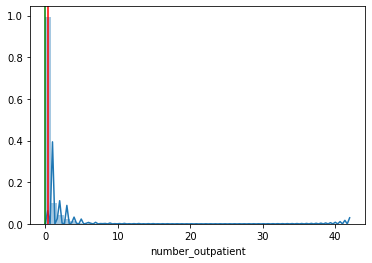

In [169]:
sns.distplot(df['number_outpatient'])
plt.axvline(df['number_outpatient'].mean(),color='r')
plt.axvline(df['number_outpatient'].median(),color='g')

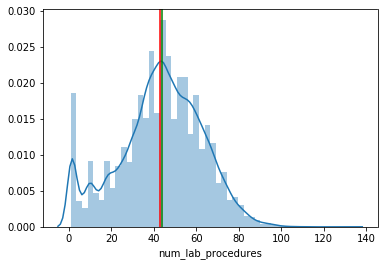

In [168]:
sns.distplot(df['num_lab_procedures'])
plt.axvline(df['num_lab_procedures'].mean(),color='r')
plt.axvline(df['num_lab_procedures'].median(),color='g')

In [179]:
df['max_glu_serum'].value_counts().plot(kind='bar')

None    96420
Norm     2597
>200     1485
>300     1264
Name: max_glu_serum, dtype: int64

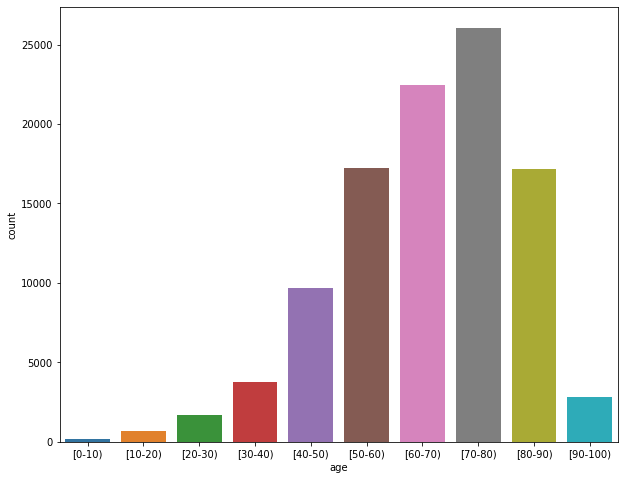

In [182]:
plt.figure(figsize=(10,8))
sns.countplot(df['age'])


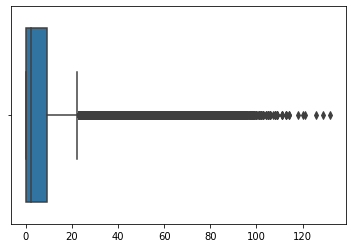

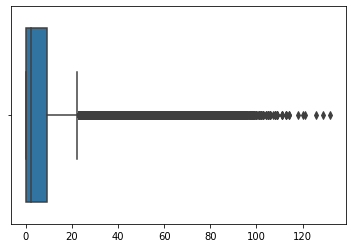

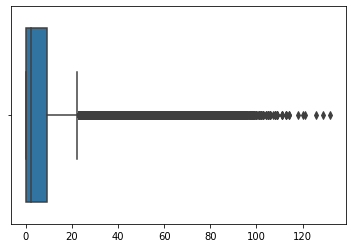

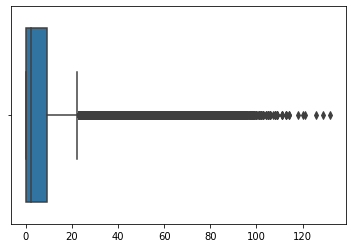

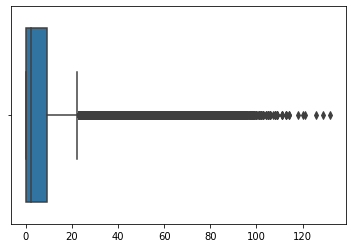

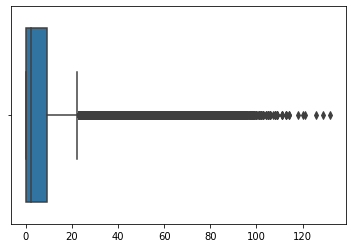

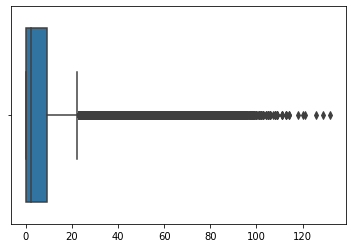

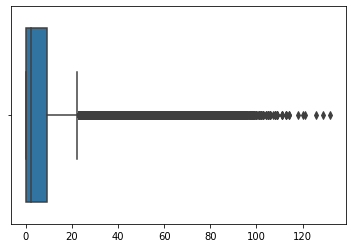

In [183]:
cols=['time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       'number_diagnoses']
for a in cols:
    sns.boxplot(df[cols])
    plt.show()

In [174]:
df.select_dtypes(exclude='object').columns

Index(['encounter_id', 'patient_nbr', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       'number_diagnoses'],
      dtype='object')

In [176]:
corr=df[['time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       'number_diagnoses']].corr()

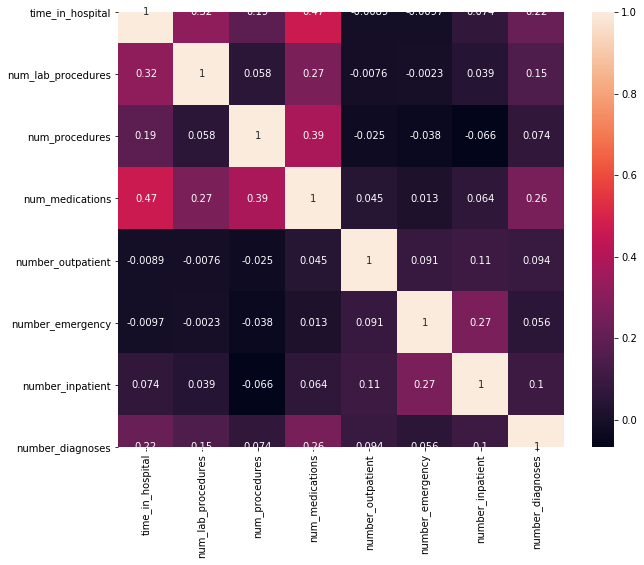

In [178]:
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True)

In [156]:
df.select_dtypes(include='object')

,race,gender,age,weight,payer_code,medical_specialty,diag_1,diag_2,diag_3,max_glu_serum,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),NaN,NaN,Pediatrics-Endocrinology,250.83,NaN,NaN,None,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),NaN,NaN,NaN,276,250.01,255,None,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),NaN,NaN,NaN,648,250,V27,None,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),NaN,NaN,NaN,8,250.43,403,None,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),NaN,NaN,NaN,197,157,250,None,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,[70-80),NaN,MC,NaN,250.13,291,458,None,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,AfricanAmerican,Female,[80-90),NaN,MC,NaN,560,276,787,None,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,Caucasian,Male,[70-80),NaN,MC,NaN,38,590,296,None,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,Caucasian,Female,[80-90),NaN,MC,Surgery-General,996,285,998,None,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [4]:
df.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

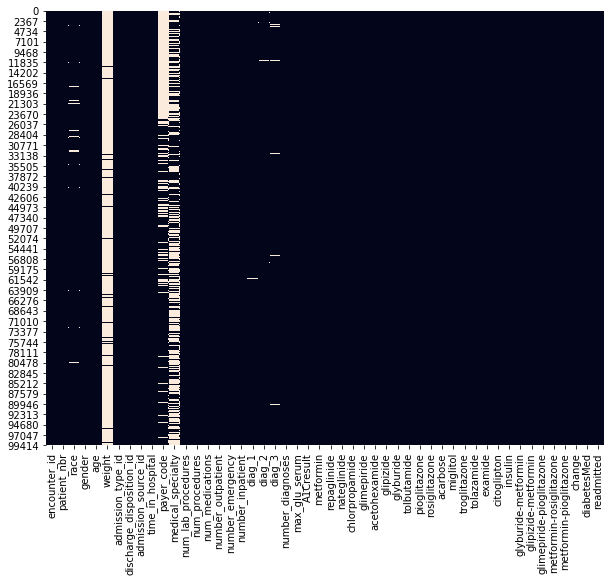

In [14]:
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull(), cbar=False);

The columns weight , payer_code,medical_specialty have a lot of null values and hence we can drop them

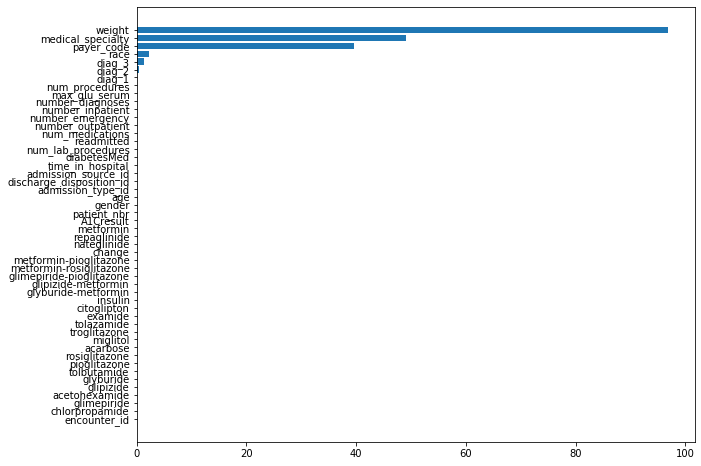

In [15]:
plt.figure(figsize=(10,8))
missing = pd.DataFrame({'column':df.columns ,'na_percent':df.isnull().sum()/len(df)*100})
missing.sort_values('na_percent',inplace=True)
plt.barh(missing['column'],width=missing['na_percent']);

-We can drop the columns with high null values as its not possible to impute it ,hence dropping columns like weight , payer_code,medical_specialty

-We can also drop the columns related to id as they won't make much effect on predicting the target


In [6]:
df1=df.drop(['weight' , 'payer_code' , 'medical_specialty', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id','encounter_id' 
,'patient_nbr'],axis=1)
df1.head()

,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),1,41,0,1,0,0,0,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),3,59,0,18,0,0,0,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),2,11,5,13,2,0,1,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),2,44,1,16,0,0,0,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),1,51,0,8,0,0,0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [20]:
df1.dtypes=='object'

race                         True
gender                       True
age                          True
time_in_hospital            False
num_lab_procedures          False
num_procedures              False
num_medications             False
number_outpatient           False
number_emergency            False
number_inpatient            False
diag_1                       True
diag_2                       True
diag_3                       True
number_diagnoses            False
max_glu_serum                True
A1Cresult                    True
metformin                    True
repaglinide                  True
nateglinide                  True
chlorpropamide               True
glimepiride                  True
acetohexamide                True
glipizide                    True
glyburide                    True
tolbutamide                  True
pioglitazone                 True
rosiglitazone                True
acarbose                     True
miglitol                     True
troglitazone  

In [25]:
cat=df1.select_dtypes(include='object').columns
cat

Index(['race', 'gender', 'age', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum',
       'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [31]:
for a in cat:
    print(df1[a].value_counts())

Caucasian          76099
AfricanAmerican    19210
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64
Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64
[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: age, dtype: int64
428    6862
414    6581
786    4016
410    3614
486    3508
       ... 
143       1
895       1
817       1
804       1
791       1
Name: diag_1, Length: 716, dtype: int64
276     6752
428     6662
250     6071
427     5036
401     3736
        ... 
7          1
953        1
232        1
E929       1
388        1
Name: diag_2, Length: 748, dtype: int64
250     11555
401      8289
276      5175
428      4577
427      3955
        ...  
970         1
542         1
540         1
E900        1
880         1
Name: diag_3, Length: 789, dtype: i

In [33]:
df1['examide'].value_counts()

No    101766
Name: examide, dtype: int64

In [32]:
df1['citoglipton'].value_counts()

No    101766
Name: citoglipton, dtype: int64

Examide and citoglipton has no variance through out and doesn't give any valuable information hence we can drop those.

In [7]:
df1.drop(['examide','citoglipton'],axis=1,inplace=True)

In [30]:
df1.columns

Index(['race', 'gender', 'age', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [6]:
df1['race'].value_counts()

Caucasian          76099
AfricanAmerican    19210
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64

In [7]:
df1['race'].isnull().sum()

2273

In [9]:
# As their is already a category which is others we can imput the null values as others
df1['race'].fillna('Other',inplace=True)
print(df1['race'].isnull().sum())
print(df1['race'].value_counts())

0
Caucasian          76099
AfricanAmerican    19210
Other               3779
Hispanic            2037
Asian                641
Name: race, dtype: int64


In [10]:
## gender column
df1['gender'].value_counts()

Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64

In [13]:
df1['gender'].unique()

array(['Female', 'Male', 'Unknown/Invalid'], dtype=object)

In [23]:
# their are 3 invalid entries which can be considered as null and since its just 3 we can drop them
l=list(df1[df1['gender']=='Unknown/Invalid'].index)
l

[30506, 75551, 82573]

In [27]:
df1.drop(l,inplace=True)

In [28]:
## age column
df1['age'].value_counts()

[70-80)     26066
[60-70)     22482
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: age, dtype: int64

In [109]:
df1['age'] = df1['age'].str[1:].str.split('-',expand=True)[0]
df1['age'] = df1['age'].astype(int)
df1['age'].value_counts()

70    26066
60    22482
50    17256
80    17197
40     9685
30     3775
90     2793
20     1657
10      691
0       161
Name: age, dtype: int64

In [27]:
pd.get_dummies(df1[cat],drop_first=True)

,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Male,gender_Unknown/Invalid,age_[10-20),age_[20-30),age_[30-40),age_[40-50),...,glyburide-metformin_Steady,glyburide-metformin_Up,glipizide-metformin_Steady,glimepiride-pioglitazone_Steady,metformin-rosiglitazone_Steady,metformin-pioglitazone_Steady,change_No,diabetesMed_Yes,readmitted_>30,readmitted_NO
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,1
3,0,1,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
4,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
101762,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1
101763,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
101764,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [35]:
df1['diag_1'].unique()

array(['250.83', '276', '648', '8', '197', '414', '428', '398', '434',
       '250.7', '157', '518', '999', '410', '682', '402', '737', '572',
       'V57', '189', '786', '427', '996', '277', '584', '462', '473',
       '411', '174', '486', '998', '511', '432', '626', '295', '196',
       '250.6', '618', '182', '845', '423', '808', '250.4', '722', '403',
       '250.11', '784', '707', '440', '151', '715', '997', '198', '564',
       '812', '38', '590', '556', '578', '250.32', '433', 'V58', '569',
       '185', '536', '255', '250.13', '599', '558', '574', '491', '560',
       '244', '250.03', '577', '730', '188', '824', '250.8', '332', '562',
       '291', '296', '510', '401', '263', '438', '70', '250.02', '493',
       '642', '625', '571', '738', '593', '250.42', '807', '456', '446',
       '575', '250.41', '820', '515', '780', '250.22', '995', '235',
       '250.82', '721', '787', '162', '724', '282', '514', 'V55', '281',
       '250.33', '530', '466', '435', '250.12', 'V53', '789', '

In [59]:
df1.isnull().sum()

race                           0
gender                         0
age                            0
time_in_hospital               0
num_lab_procedures             0
num_procedures                 0
num_medications                0
number_outpatient              0
number_emergency               0
number_inpatient               0
diag_1                        21
diag_2                       358
diag_3                      1423
number_diagnoses               0
max_glu_serum                  0
A1Cresult                      0
metformin                      0
repaglinide                    0
nateglinide                    0
chlorpropamide                 0
glimepiride                    0
acetohexamide                  0
glipizide                      0
glyburide                      0
tolbutamide                    0
pioglitazone                   0
rosiglitazone                  0
acarbose                       0
miglitol                       0
troglitazone                   0
tolazamide

In [67]:
diag_cols = ['diag_1','diag_2','diag_3']
for col in diag_cols:
    df1[col].fillna('0',inplace=True)

In [68]:
df1.isnull().sum()

race                        0
gender                      0
age                         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol                    0
troglitazone                0
tolazamide                  0
examide                     0
citoglipton                 0
insulin   

In [70]:
df1['diag_1'].dtype

dtype('O')

In [71]:
# dealing with null values in diag columns
diag_cols = ['diag_1','diag_2','diag_3']
for col in diag_cols:
    df1[col] = df1[col].str.replace('E','-')
    df1[col] = df1[col].str.replace('V','-')
    condition = df1[col].str.contains('250')
    df1.loc[condition,col] = '250'
    

df1[diag_cols] = df1[diag_cols].astype(float)

df1[diag_cols]

,diag_1,diag_2,diag_3
0,250.0,0.0,0.0
1,276.0,250.0,255.0
2,648.0,250.0,-27.0
3,8.0,250.0,403.0
4,197.0,157.0,250.0
...,...,...,...
101761,250.0,291.0,458.0
101762,560.0,276.0,787.0
101763,38.0,590.0,296.0
101764,996.0,285.0,998.0


In [73]:
# diagnosis grouping
for col in diag_cols:
    df1['temp']=np.nan
    condition = df1[col]==250
    df1.loc[condition,'temp']='Diabetes'
    
    condition = (df1[col]>=390) & (df1[col]<=458) | (df1[col]==785)
    df1.loc[condition,'temp']='Circulatory'
    
    condition = (df1[col]>=460) & (df1[col]<=519) | (df1[col]==786)
    df1.loc[condition,'temp']='Respiratory'
    
    condition = (df1[col]>=520) & (df1[col]<=579) | (df1[col]==787)
    df1.loc[condition,'temp']='Digestive'
    
    condition = (df1[col]>=580) & (df1[col]<=629) | (df1[col]==788)
    df1.loc[condition,'temp']='Genitourinary'
    
    condition = (df1[col]>=800) & (df1[col]<=999)
    df1.loc[condition,'temp']='Injury'
    
    condition = (df1[col]>=710) & (df1[col]<=739)
    df1.loc[condition,'temp']='Muscoloskeletal'
    
    condition = (df1[col]>=140) & (df1[col]<=239)
    df1.loc[condition,'temp']='Neoplasms'
    
    condition = df1[col]==0
    df1.loc[condition,'temp']='Others'
    
    df1[col]=df1['temp']
    df1.drop('temp',axis=1,inplace=True)


In [82]:
for col in diag_cols:
    df1[col].fillna('Others',inplace=True)

In [83]:
df1.isnull().sum()

race                        0
gender                      0
age                         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol                    0
troglitazone                0
tolazamide                  0
examide                     0
citoglipton                 0
insulin   

In [86]:
df1['diag_3'].value_counts()

Others             30721
Circulatory        30201
Diabetes           17157
Respiratory         7358
Genitourinary       6680
Digestive           3930
Injury              1945
Muscoloskeletal     1915
Neoplasms           1856
Name: diag_3, dtype: int64

In [101]:
## Label encoding for target
df1['readmitted']=df['readmitted'].replace({'NO':0,'>30':0,'<30':1})

In [102]:
df1['readmitted'].value_counts()

0    90406
1    11357
Name: readmitted, dtype: int64

In [104]:
df1['readmitted'].dtype

dtype('int64')

In [89]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [90]:
from category_encoders import target_encoder 

In [120]:
y=df1['readmitted']
x=df1.drop('readmitted',1)
enc=target_encoder.TargetEncoder(cols=['diag_1','diag_2','diag_3'])
x=enc.fit_transform(x,y)

In [106]:
x[['diag_1','diag_2','diag_3']]

,diag_1,diag_2,diag_3
0,0.129839,0.112112,0.108493
1,0.114762,0.105831,0.108493
2,0.114762,0.105831,0.108493
3,0.114762,0.105831,0.108010
4,0.100786,0.149195,0.105671
...,...,...,...
101761,0.129839,0.112112,0.108010
101762,0.107124,0.112112,0.119593
101763,0.114762,0.117598,0.108493
101764,0.122490,0.112112,0.115681


In [121]:
x.head()

,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
0,Caucasian,Female,0,1,41,0,1,0,0,0,...,No,No,No,No,No,No,No,No,No,No
1,Caucasian,Female,10,3,59,0,18,0,0,0,...,No,No,Up,No,No,No,No,No,Ch,Yes
2,AfricanAmerican,Female,20,2,11,5,13,2,0,1,...,No,No,No,No,No,No,No,No,No,Yes
3,Caucasian,Male,30,2,44,1,16,0,0,0,...,No,No,Up,No,No,No,No,No,Ch,Yes
4,Caucasian,Male,40,1,51,0,8,0,0,0,...,No,No,Steady,No,No,No,No,No,Ch,Yes


In [122]:
x.select_dtypes('object')

,race,gender,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,...,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
0,Caucasian,Female,None,None,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
1,Caucasian,Female,None,None,No,No,No,No,No,No,...,No,No,Up,No,No,No,No,No,Ch,Yes
2,AfricanAmerican,Female,None,None,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,Yes
3,Caucasian,Male,None,None,No,No,No,No,No,No,...,No,No,Up,No,No,No,No,No,Ch,Yes
4,Caucasian,Male,None,None,No,No,No,No,No,No,...,No,No,Steady,No,No,No,No,No,Ch,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,None,>8,Steady,No,No,No,No,No,...,No,No,Down,No,No,No,No,No,Ch,Yes
101762,AfricanAmerican,Female,None,None,No,No,No,No,No,No,...,No,No,Steady,No,No,No,No,No,No,Yes
101763,Caucasian,Male,None,None,Steady,No,No,No,No,No,...,No,No,Down,No,No,No,No,No,Ch,Yes
101764,Caucasian,Female,None,None,No,No,No,No,No,No,...,No,No,Up,No,No,No,No,No,Ch,Yes


In [123]:
cols=x.select_dtypes('object').columns
cols

Index(['race', 'gender', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed'],
      dtype='object')

In [128]:
model=pd.get_dummies(columns=['race', 'gender', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed'],data=x,drop_first=True)

In [129]:
model.isnull().sum()

age                                0
time_in_hospital                   0
num_lab_procedures                 0
num_procedures                     0
num_medications                    0
                                  ..
glimepiride-pioglitazone_Steady    0
metformin-rosiglitazone_Steady     0
metformin-pioglitazone_Steady      0
change_No                          0
diabetesMed_Yes                    0
Length: 73, dtype: int64

In [131]:
# splitting the data into train and test dataset
X_train, X_test, y_train, y_test = train_test_split(model, y, test_size=0.3, random_state=1)

In [132]:
linreg=LogisticRegression()
linreg.fit(X_train,y_train)
y_pred=linreg.predict(X_test)
y_pred_proba=linreg.predict_proba(X_test)[:,1]
print('Test accuracy : ',accuracy_score(y_test,y_pred))
print('Test auc score : ',roc_auc_score(y_test,y_pred_proba))

Test accuracy :  0.8873530086147597
Test auc score :  0.6211443351188892


C:\Users\gmani\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [133]:
confusion_matrix(y_test,y_pred)

array([[27038,    77],
       [ 3362,    52]], dtype=int64)

In [135]:
### one hot encoding
cols=df1.select_dtypes('object').columns
cols

Index(['race', 'gender', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum',
       'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed'],
      dtype='object')

In [140]:
dummy=pd.get_dummies(columns=['race', 'gender', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum',
       'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed'],data=df1,drop_first=True)

In [190]:
dummy.T

,0,1,2,3,4,5,6,7,8,9,...,101756,101757,101758,101759,101760,101761,101762,101763,101764,101765
age,0,10,20,30,40,50,60,70,80,90,...,60,70,80,80,60,70,80,70,80,70
time_in_hospital,1,3,2,2,1,3,4,5,13,12,...,2,5,5,1,6,3,5,1,10,6
num_lab_procedures,41,59,11,44,51,31,70,73,68,33,...,46,21,76,1,45,51,33,53,45,13
num_procedures,0,0,5,1,0,6,1,0,2,3,...,6,1,1,0,1,0,3,0,2,3
num_medications,1,18,13,16,8,16,21,12,28,18,...,17,16,22,15,25,16,18,9,21,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
glimepiride-pioglitazone_Steady,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
metformin-rosiglitazone_Steady,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
metformin-pioglitazone_Steady,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
change_No,1,0,1,0,0,1,0,1,0,0,...,1,1,0,0,0,0,1,0,0,1


In [192]:
df1.race.value_counts()

Caucasian          76099
AfricanAmerican    19210
Other               3776
Hispanic            2037
Asian                641
Name: race, dtype: int64

In [191]:
dummy.columns

Index(['age', 'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'readmitted', 'race_Asian',
       'race_Caucasian', 'race_Hispanic', 'race_Other', 'gender_Male',
       'diag_1_Diabetes', 'diag_1_Digestive', 'diag_1_Genitourinary',
       'diag_1_Injury', 'diag_1_Muscoloskeletal', 'diag_1_Neoplasms',
       'diag_1_Others', 'diag_1_Respiratory', 'diag_2_Diabetes',
       'diag_2_Digestive', 'diag_2_Genitourinary', 'diag_2_Injury',
       'diag_2_Muscoloskeletal', 'diag_2_Neoplasms', 'diag_2_Others',
       'diag_2_Respiratory', 'diag_3_Diabetes', 'diag_3_Digestive',
       'diag_3_Genitourinary', 'diag_3_Injury', 'diag_3_Muscoloskeletal',
       'diag_3_Neoplasms', 'diag_3_Others', 'diag_3_Respiratory',
       'max_glu_serum_>300', 'max_glu_serum_None', 'max_glu_serum_Norm',
       'A1Cresult_>8', 'A1Cresult_None', 'A1Cresult_Norm', 'metformin_No',
       'metfor

In [194]:
x=dummy.drop('readmitted',1)
y=dummy['readmitted']

In [195]:
# modeling
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [1]:
linreg=LogisticRegression()
linreg.fit(X_train,y_train)
y_pred_train=linreg.predict(X_train)
y_pred=linreg.predict(X_test)
y_pred_proba=linreg.predict_proba(X_test)[:,1]
print('Test accuracy : ',accuracy_score(y_test,y_pred))
print('Test auc score : ',roc_auc_score(y_test,y_pred_proba))
print('Train accuracy: ',accuracy_score(y_train,y_pred_train))

NameError: name 'LogisticRegression' is not defined

In [151]:
confusion_matrix(y_test,y_pred)

array([[27044,    71],
       [ 3359,    55]], dtype=int64)

In [197]:
## Statsmodel 
x_c = sm.add_constant(x)
mod = sm.Logit(y, x_c).fit()

mod.summary()

         Current function value: 0.336514
         Iterations: 35


LinAlgError: Singular matrix

In [9]:
df1=df.iloc[:,30:40]
df1

,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide
0,No,No,No,No,No,No,No,No,No,No
1,No,No,No,No,No,No,No,No,No,No
2,Steady,No,No,No,No,No,No,No,No,No
3,No,No,No,No,No,No,No,No,No,No
4,Steady,No,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...
101761,No,No,No,No,No,No,No,No,No,No
101762,No,No,No,No,No,No,No,No,No,No
101763,No,No,No,No,No,No,No,No,No,No
101764,Steady,No,No,Steady,No,No,No,No,No,No


In [12]:
## glipizide

df1['glipizide'].value_counts()

No        89080
Steady    11356
Up          770
Down        560
Name: glipizide, dtype: int64

In [17]:
df1.columns

Index(['glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
       'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide',
       'examide'],
      dtype='object')

In [18]:
df1['glyburide'].value_counts()

No        91116
Steady     9274
Up          812
Down        564
Name: glyburide, dtype: int64

In [19]:
df1['tolbutamide'].value_counts()

No        101743
Steady        23
Name: tolbutamide, dtype: int64

In [20]:
df1['pioglitazone'].value_counts()

No        94438
Steady     6976
Up          234
Down        118
Name: pioglitazone, dtype: int64

In [21]:
df1['rosiglitazone'].value_counts()

No        95401
Steady     6100
Up          178
Down         87
Name: rosiglitazone, dtype: int64

In [22]:
df1['acarbose'].value_counts()

No        101458
Steady       295
Up            10
Down           3
Name: acarbose, dtype: int64

In [23]:
df1['miglitol'].value_counts()

No        101728
Steady        31
Down           5
Up             2
Name: miglitol, dtype: int64

In [24]:
df1['troglitazone'].value_counts()

No        101763
Steady         3
Name: troglitazone, dtype: int64

In [25]:
df1['tolazamide'].value_counts()

No        101727
Steady        38
Up             1
Name: tolazamide, dtype: int64

In [26]:
df1['examide'].value_counts()

No    101766
Name: examide, dtype: int64

In [6]:
df2=pd.get_dummies(df1[['glipizide', 'glyburide', 'tolbutamide', 'pioglitazone','rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide']],drop_first=True)

In [7]:
df3=df1['examide'].replace({'No':0})

In [8]:
df4=pd.concat([df2,df3,df['readmitted']],axis=1)
df4

,glipizide_No,glipizide_Steady,glipizide_Up,glyburide_No,glyburide_Steady,glyburide_Up,tolbutamide_Steady,pioglitazone_No,pioglitazone_Steady,pioglitazone_Up,...,acarbose_Steady,acarbose_Up,miglitol_No,miglitol_Steady,miglitol_Up,troglitazone_Steady,tolazamide_Steady,tolazamide_Up,examide,readmitted
0,1,0,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,NO
1,1,0,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,>30
2,0,1,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,NO
3,1,0,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,NO
4,0,1,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,1,0,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,>30
101762,1,0,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,NO
101763,1,0,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,NO
101764,0,1,0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,NO


In [19]:
df4['readmitted']=np.where(df4['readmitted']=='<30',1,0)
df4

,glipizide_No,glipizide_Steady,glipizide_Up,glyburide_No,glyburide_Steady,glyburide_Up,tolbutamide_Steady,pioglitazone_No,pioglitazone_Steady,pioglitazone_Up,...,acarbose_Steady,acarbose_Up,miglitol_No,miglitol_Steady,miglitol_Up,troglitazone_Steady,tolazamide_Steady,tolazamide_Up,examide,readmitted
0,1,0,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,1,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,1,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,1,0,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
101762,1,0,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
101763,1,0,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
101764,0,1,0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [20]:
df4['readmitted'].value_counts()

0    90409
1    11357
Name: readmitted, dtype: int64

In [21]:
df4.to_csv('project_30_40.csv')

### EDA

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [23]:
df4.columns

Index(['glipizide_No', 'glipizide_Steady', 'glipizide_Up', 'glyburide_No',
       'glyburide_Steady', 'glyburide_Up', 'tolbutamide_Steady',
       'pioglitazone_No', 'pioglitazone_Steady', 'pioglitazone_Up',
       'rosiglitazone_No', 'rosiglitazone_Steady', 'rosiglitazone_Up',
       'acarbose_No', 'acarbose_Steady', 'acarbose_Up', 'miglitol_No',
       'miglitol_Steady', 'miglitol_Up', 'troglitazone_Steady',
       'tolazamide_Steady', 'tolazamide_Up', 'examide', 'readmitted'],
      dtype='object')

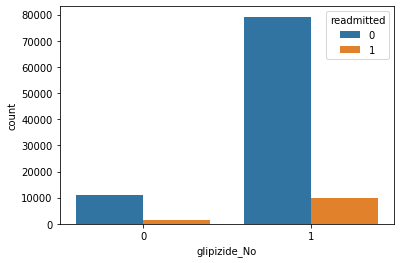

In [28]:
sns.countplot(df4['glipizide_No'],hue=df4['readmitted'])
plt.show()

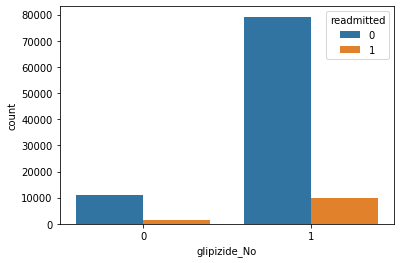

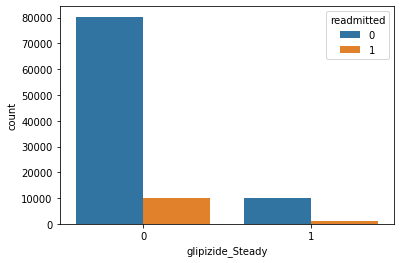

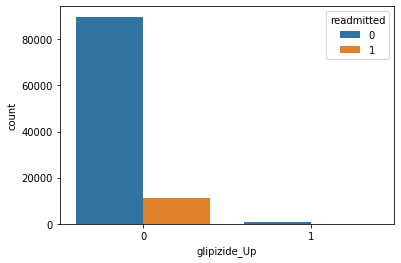

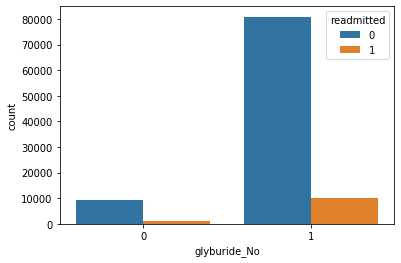

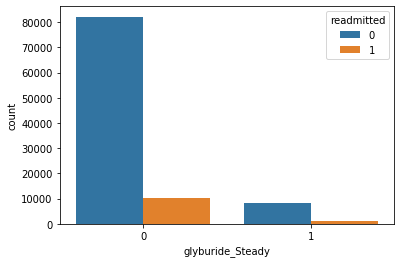

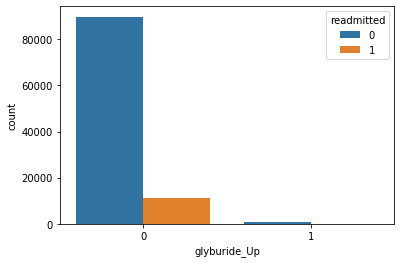

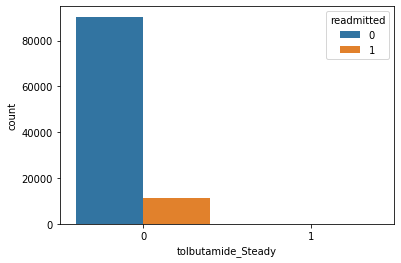

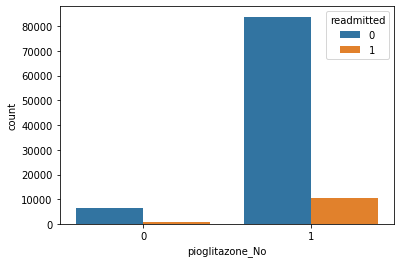

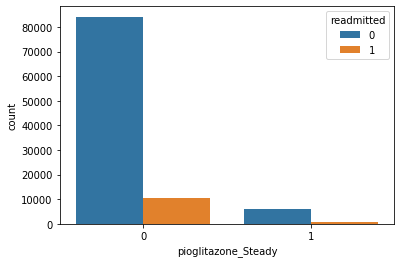

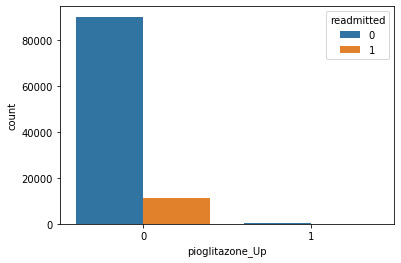

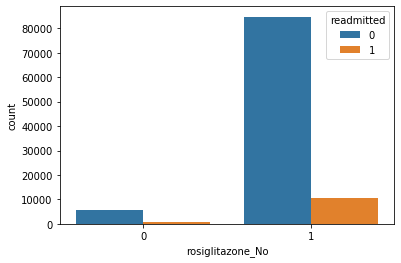

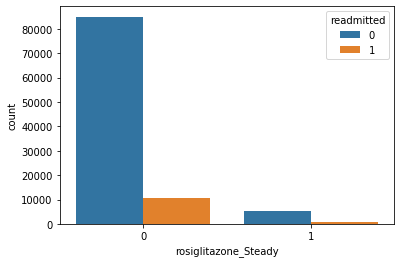

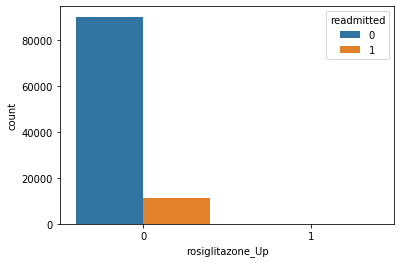

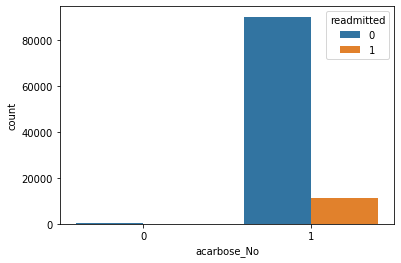

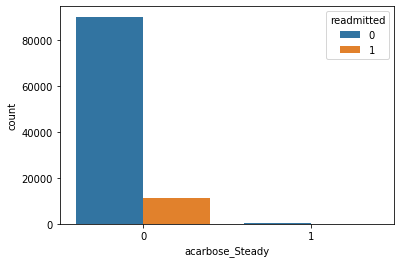

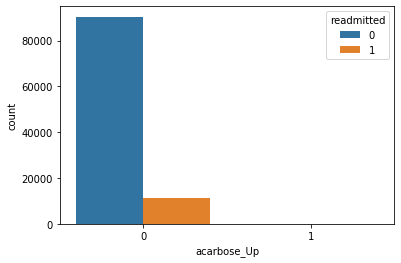

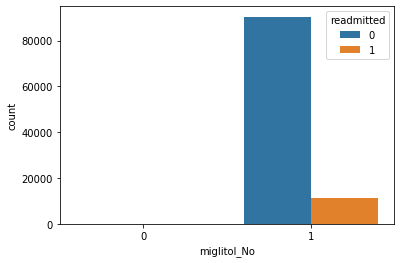

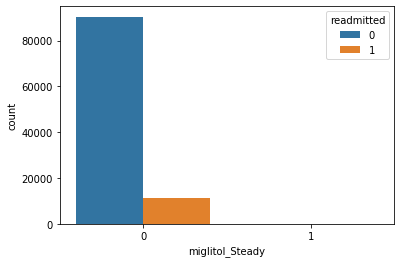

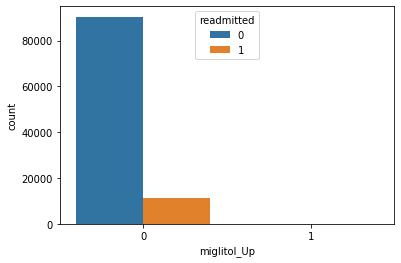

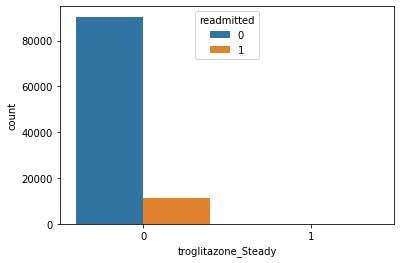

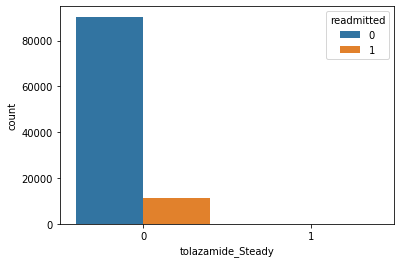

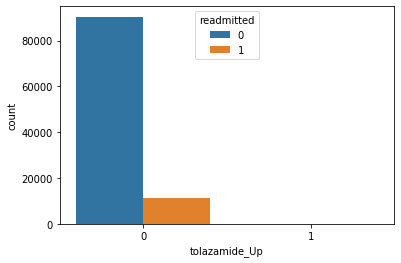

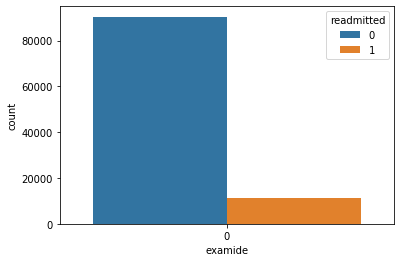

In [30]:
cols=df4.drop('readmitted',axis=1).columns
for a in cols:
    sns.countplot(df4[a],hue=df4['readmitted'])
    plt.show()

In [31]:
df1

,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide
0,No,No,No,No,No,No,No,No,No,No
1,No,No,No,No,No,No,No,No,No,No
2,Steady,No,No,No,No,No,No,No,No,No
3,No,No,No,No,No,No,No,No,No,No
4,Steady,No,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...
101761,No,No,No,No,No,No,No,No,No,No
101762,No,No,No,No,No,No,No,No,No,No
101763,No,No,No,No,No,No,No,No,No,No
101764,Steady,No,No,Steady,No,No,No,No,No,No


In [33]:
df5=pd.concat([df1,df['readmitted']],axis=1)
df5.head()

,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,readmitted
0,No,No,No,No,No,No,No,No,No,No,NO
1,No,No,No,No,No,No,No,No,No,No,>30
2,Steady,No,No,No,No,No,No,No,No,No,NO
3,No,No,No,No,No,No,No,No,No,No,NO
4,Steady,No,No,No,No,No,No,No,No,No,NO


In [34]:

df5['readmitted']=np.where(df5['readmitted']=='<30','Yes','No')

In [35]:
df5.head()

,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,readmitted
0,No,No,No,No,No,No,No,No,No,No,No
1,No,No,No,No,No,No,No,No,No,No,No
2,Steady,No,No,No,No,No,No,No,No,No,No
3,No,No,No,No,No,No,No,No,No,No,No
4,Steady,No,No,No,No,No,No,No,No,No,No


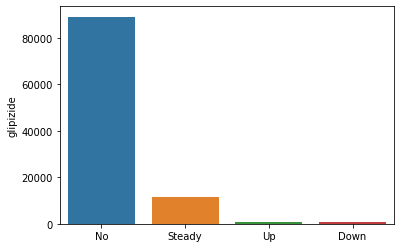

In [39]:
sns.barplot(x=df5['glipizide'].value_counts().index,y=df5['glipizide'].value_counts())

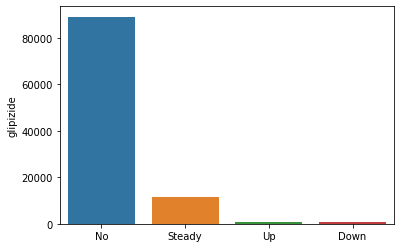

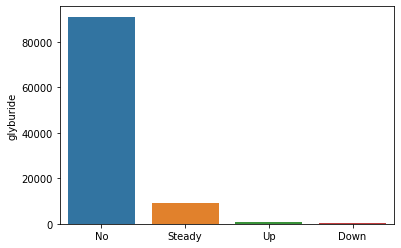

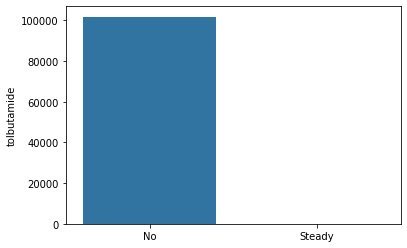

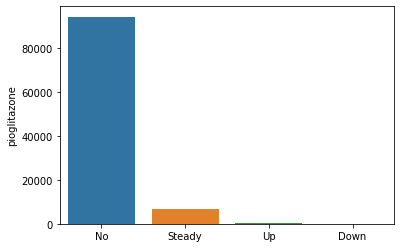

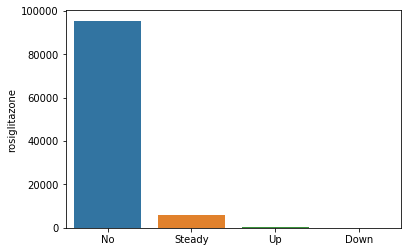

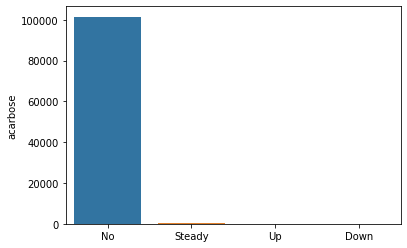

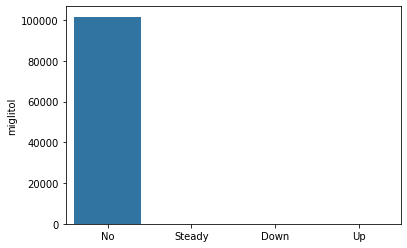

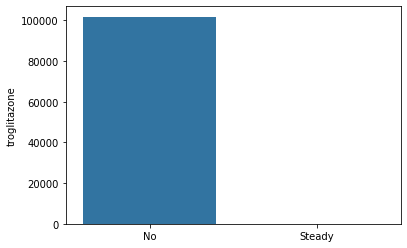

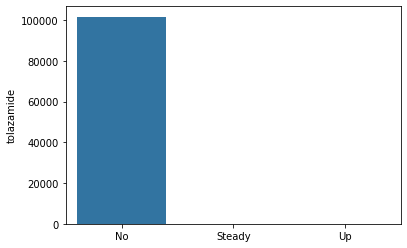

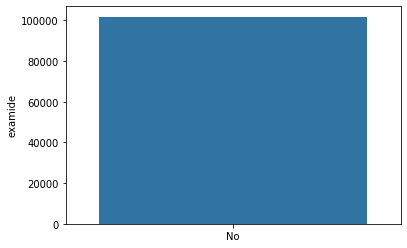

In [41]:
cols=df5.drop('readmitted',axis=1).columns
for a in cols:
    sns.barplot(x=df5[a].value_counts().index,y=df5[a].value_counts())
    plt.show()

In [17]:
data= pd.read_csv('modeldata.csv')
data.head()

,Unnamed: 0,age,time_in_hospital,race_AfricanAmerican,gender_Male,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,...,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up,glipizide-metformin_Steady,glimepiride-pioglitazone_Steady,metformin-rosiglitazone_Steady,metformin-pioglitazone_Steady,change_No,diabetesMed_Yes,readmitted
0,0,0.0,1.0,0.0,0.0,41,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
1,1,10.0,3.0,0.0,0.0,59,0,18,0,0,...,1,0,0,0,0,0,0,0,1,0
2,2,20.0,2.0,1.0,0.0,11,5,13,2,0,...,1,0,0,0,0,0,0,1,1,0
3,3,30.0,2.0,0.0,1.0,44,1,16,0,0,...,1,0,0,0,0,0,0,0,1,0
4,4,40.0,1.0,0.0,1.0,51,0,8,0,0,...,1,0,0,0,0,0,0,0,1,0


In [18]:
data.shape

(101766, 73)

In [19]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [20]:
data.head()

,age,time_in_hospital,race_AfricanAmerican,gender_Male,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up,glipizide-metformin_Steady,glimepiride-pioglitazone_Steady,metformin-rosiglitazone_Steady,metformin-pioglitazone_Steady,change_No,diabetesMed_Yes,readmitted
0,0.0,1.0,0.0,0.0,41,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,10.0,3.0,0.0,0.0,59,0,18,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,20.0,2.0,1.0,0.0,11,5,13,2,0,1,...,1,0,0,0,0,0,0,1,1,0
3,30.0,2.0,0.0,1.0,44,1,16,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,40.0,1.0,0.0,1.0,51,0,8,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,roc_auc_score,classification_report,confusion_matrix

In [22]:
x=data.drop('readmitted',axis=1)
y=data['readmitted']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [24]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
y_pred_proba=lr.predict_proba(X_test)[:,1]
print('Test accuracy : ',accuracy_score(y_test,y_pred))
print('Test auc score : ',roc_auc_score(y_test,y_pred_proba))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [57]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     27210
           1       0.39      0.01      0.02      3320

    accuracy                           0.89     30530
   macro avg       0.64      0.50      0.48     30530
weighted avg       0.84      0.89      0.84     30530



In [58]:
confusion_matrix(y_test,y_pred)

array([[27145,    65],
       [ 3279,    41]], dtype=int64)

In [187]:
import statsmodels.api as sm

In [189]:
x

,age,time_in_hospital,race_AfricanAmerican,gender_Male,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,insulin_Up,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up,glipizide-metformin_Steady,glimepiride-pioglitazone_Steady,metformin-rosiglitazone_Steady,metformin-pioglitazone_Steady,change_No,diabetesMed_Yes
0,0.0,1.0,0.0,0.0,41,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,10.0,3.0,0.0,0.0,59,0,18,0,0,0,...,1,1,0,0,0,0,0,0,0,1
2,20.0,2.0,1.0,0.0,11,5,13,2,0,1,...,0,1,0,0,0,0,0,0,1,1
3,30.0,2.0,0.0,1.0,44,1,16,0,0,0,...,1,1,0,0,0,0,0,0,0,1
4,40.0,1.0,0.0,1.0,51,0,8,0,0,0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,70.0,3.0,1.0,1.0,51,0,16,0,0,0,...,0,1,0,0,0,0,0,0,0,1
101762,80.0,5.0,1.0,0.0,33,3,18,0,0,1,...,0,1,0,0,0,0,0,0,1,1
101763,70.0,1.0,0.0,1.0,53,0,9,1,0,0,...,0,1,0,0,0,0,0,0,0,1
101764,80.0,10.0,0.0,0.0,45,2,21,0,0,1,...,1,1,0,0,0,0,0,0,0,1


In [188]:
x_c = sm.add_constant(x)
mod = sm.Logit(y, x_c)
result = mod.fit()
result.summary()

C:\Users\gmani\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


         Current function value: 0.328063
         Iterations: 35


LinAlgError: Singular matrix

In [11]:
data.columns

Index(['Unnamed: 0', 'age', 'time_in_hospital', 'race_AfricanAmerican',
       'gender_Male', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'max_glu_serum_>300', 'max_glu_serum_None', 'max_glu_serum_Norm',
       'A1Cresult_>8', 'A1Cresult_None', 'A1Cresult_Norm', 'metformin_No',
       'metformin_Steady', 'metformin_Up', 'repaglinide_No',
       'repaglinide_Steady', 'repaglinide_Up', 'nateglinide_No',
       'nateglinide_Steady', 'nateglinide_Up', 'chlorpropamide_No',
       'chlorpropamide_Steady', 'chlorpropamide_Up', 'glimepiride_No',
       'glimepiride_Steady', 'glimepiride_Up', 'acetohexamide_Steady',
       'glipizide_No', 'glipizide_Steady', 'glipizide_Up', 'glyburide_No',
       'glyburide_Steady', 'glyburide_Up', 'tolbutamide_Steady',
       'pioglitazone_No', 'pioglitazone_Steady', 'pioglitazone_Up',
       'rosiglitazone_No', 'ro

In [12]:
data.gender_Male.value_counts()

0.0    54708
1.0    47055
Name: gender_Male, dtype: int64

In [13]:
data['diag_2'].unique()

array([8.10055870e-02, 1.28693368e-01, 7.34640090e-02, 2.70270270e-01,
       1.52941176e-01, 9.70381920e-02, 1.12612613e-01, 1.11795075e-01,
       1.53125000e-01, 1.51965994e-01, 9.33333330e-02, 1.10332750e-01,
       7.69230770e-02, 7.40740740e-02, 1.22036262e-01, 1.31578947e-01,
       7.17344750e-02, 5.73770490e-02, 1.11346445e-01, 1.26388472e-01,
       1.45376804e-01, 1.06557377e-01, 1.16575592e-01, 2.94117650e-02,
       1.47577093e-01, 1.30434783e-01, 1.12582781e-01, 8.44327180e-02,
       1.57004831e-01, 1.19964455e-01, 1.07611549e-01, 1.12834550e-01,
       1.02707750e-01, 1.30097087e-01, 3.89610390e-02, 1.42571286e-01,
       9.40170940e-02, 2.01970443e-01, 7.94551650e-02, 1.27659574e-01,
       1.35531136e-01, 9.80392160e-02, 1.58798283e-01, 1.02564103e-01,
       1.27167630e-01, 1.12676056e-01, 1.06145251e-01, 1.39024390e-01,
       8.30188680e-02, 2.14285714e-01, 1.59600998e-01, 1.08808290e-01,
       8.34932820e-02, 9.27631580e-02, 1.25000000e-01, 9.85915490e-02,
      

In [17]:
#pd.options.display.max_rows=None
pd.options.display.max_rows=None

In [18]:
data.isnull().sum()

Unnamed: 0                         0
age                                3
time_in_hospital                   3
race_AfricanAmerican               3
gender_Male                        3
num_lab_procedures                 0
num_procedures                     0
num_medications                    0
number_outpatient                  0
number_emergency                   0
number_inpatient                   0
diag_1                             0
diag_2                             0
diag_3                             0
number_diagnoses                   0
max_glu_serum_>300                 0
max_glu_serum_None                 0
max_glu_serum_Norm                 0
A1Cresult_>8                       0
A1Cresult_None                     0
A1Cresult_Norm                     0
metformin_No                       0
metformin_Steady                   0
metformin_Up                       0
repaglinide_No                     0
repaglinide_Steady                 0
repaglinide_Up                     0
n

In [45]:
data['age'].fillna(data['age'].median(),inplace=True)

In [47]:
data['time_in_hospital'].fillna(data['time_in_hospital'].median(),inplace=True)

In [51]:
data['race_AfricanAmerican'].fillna(data['race_AfricanAmerican'].median(),inplace=True)
data['gender_Male'].fillna(data['gender_Male'].median(),inplace=True)

In [48]:
data['race_AfricanAmerican'].value_counts()

0.0    82553
1.0    19210
Name: race_AfricanAmerican, dtype: int64

In [49]:
data['gender_Male'].value_counts()

0.0    54708
1.0    47055
Name: gender_Male, dtype: int64

In [50]:
data['race_AfricanAmerican'].median()

0.0